# ARN - Practical Work 3 - Mice's sleep stages classification with MLP
Students :
- Baquerizo Emily
- Dousse Rafael

## Exercice 1

In [ ]:
#importation of library
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import keras
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from keras import layers
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from keras.utils import to_categorical

In [ ]:
mice_eeg_1 = pd.read_csv('pw3_data/EEG_mouse_data_1.csv')

mice_egg_2 = pd.read_csv('pw3_data/EEG_mouse_data_2.csv')

mice_eeg_total = pd.concat([mice_eeg_1, mice_egg_2])

In [ ]:
data_train_1 = mice_eeg_total.iloc[:, :26]


In [ ]:
# data_train preparation
data_train_1["state"][data_train_1["state"] == "w"] = -1
data_train_1["state"][data_train_1["state"] != -1] = 1
#data_train_1["state"]

# data normalization
scaler = StandardScaler()
data_train_normalized_1 = scaler.fit_transform(data_train_1.iloc[:,1:])
#data_train_normalized_1.shape


In [ ]:
# %pip install keras
# %pip install tensorflow

In [ ]:
def create_model_1():

  mlp = keras.Sequential([
      layers.Input((25,)),
      layers.Dense(4, activation="tanh"), # Try different numbers of hidden neurons here (e.g. 2, 4, 8, 32, 128)
      layers.Dense(1, activation="tanh"),
  ])

  # Experiment with hyperparameters here:
  # momentum: [0, 0.8, 0.9, 0.99]
  # learning_rate: [0.1, 0.01, 0.001, 0.0001]
  mlp.compile(
      optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.99),  #0.01
      loss="mse",
  )

  return mlp

mlp = create_model_1()
mlp.summary()

In [ ]:
keras.utils.set_random_seed(123)
kf = KFold(n_splits=3, shuffle=True) 

def model_train_1(fctn_model, input_data ,output_data):
    history_list = []
    trained_mlp = []
    cm_list = []

    for i,(train_index, test_index) in enumerate(kf.split(data_train_normalized_1)) :
        mlp = fctn_model()
        history = mlp.fit(
            x = np.float32(input_data)[train_index],
            y = np.float32(output_data.to_numpy())[train_index],
            validation_data = (np.float32(input_data)[test_index], np.float32(output_data.to_numpy())[test_index]),
            epochs = 50
        )

        cm = confusion_matrix(np.float32(output_data.to_numpy())[test_index] > 0, mlp(np.float32(input_data)[test_index]) > 0)

        history_list.append(history)
        trained_mlp.append(mlp)
        cm_list.append(cm)

    return history_list, trained_mlp, train_index, test_index, cm_list

In [ ]:
input_data_1 = data_train_normalized_1
output_data_1 = data_train_1['state']

history_list_1, trained_mlp_1, train_index_1, test_index_1, cm_list_1 = model_train_1(create_model_1, input_data_1, output_data_1)

In [ ]:
# Plot confusion matrix
def plot_confusion_matrix_1(confusion_matrix, title):
    pl.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix.astype(int), annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Négatif predit", "Positif prédit"], yticklabels=["Négatif réel", "Positif réel"])
    pl.title(title)
    pl.xlabel('Predicted')
    pl.ylabel('True')
    pl.show()


for i, cm in enumerate(cm_list_1):
    plot_confusion_matrix_1(cm, title=f"Ex1 : Fold {i+1}")

In [ ]:
def plot_history(history_l) :
    train_losses = np.array([history.history['loss'] for history in history_l])
    val_losses = np.array([history.history['val_loss'] for history in history_l])

    # Calculate mean and standard deviation for training and validation losses
    mean_train_loss = np.mean(train_losses, axis=0)
    std_train_loss = np.std(train_losses, axis=0)
    mean_val_loss = np.mean(val_losses, axis=0)
    std_val_loss = np.std(val_losses, axis=0)

    # Plot mean and standard deviation for training loss
    pl.plot(mean_train_loss, label='Training Loss (Mean)')
    pl.fill_between(range(len(mean_train_loss)), mean_train_loss - std_train_loss, mean_train_loss + std_train_loss, alpha=0.3, label='Training Loss (Std)')

    # Plot mean and standard deviation for validation loss
    pl.plot(mean_val_loss, label='Validation Loss (Mean)')
    pl.fill_between(range(len(mean_val_loss)), mean_val_loss - std_val_loss, mean_val_loss + std_val_loss, alpha=0.3, label='Validation Loss (Std)')

    # Add labels and legend
    pl.xlabel('Epochs')
    pl.ylabel('Loss')
    pl.legend()

    # Display the plot
    pl.show()

plot_history(history_list_1)

In [ ]:
#f1 score mean
f1_scores_1 = []

for i, mlp in enumerate(trained_mlp_1):
    y_pred = np.round(mlp.predict(np.float32(input_data_1)[test_index_1]) > 0)
    f1 = f1_score(np.float32(output_data_1.to_numpy())[test_index_1] > 0, y_pred)
    f1_scores_1.append(f1)

f1_mean_1 = np.mean(f1_scores_1)

for i, f1 in enumerate(f1_scores_1):
    print(f"Fold {i+1}, F1 Score: {f1}")

print(f"\nMean F1 Score: {f1_mean_1}")

## Exercice 2

In [ ]:
data_train_2 = mice_eeg_total.iloc[:, :26]
#data_train_2

data_train_2["state"][data_train_2["state"] == "n"] = 0
data_train_2["state"][data_train_2["state"] == "r"] = 1
data_train_2["state"][data_train_2["state"] == "w"] = 2

data_train_2["state"]

# data normalization
scaler_2 = StandardScaler()
data_train_normalized_2 = scaler_2.fit_transform(data_train_2.iloc[:,1:])
data_train_normalized_2.shape

In [ ]:
def create_model_2():

  mlp = keras.Sequential([
      layers.Input((25,)),
      layers.Dense(4, activation="sigmoid"), # Try different numbers of hidden neurons here (e.g. 2, 4, 8, 32, 128)
      layers.Dense(3, activation="softmax"), # softmax because we have 3 classes
  ])

  # Experiment with hyperparameters here:
  # momentum: [0, 0.8, 0.9, 0.99]
  # learning_rate: [0.1, 0.01, 0.001, 0.0001]
  mlp.compile(
      optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.99),  #0.01
      loss="mse",
  )

  return mlp

mlp_2 = create_model_2()
mlp_2.summary()

In [ ]:
keras.utils.set_random_seed(123)
kf = KFold(n_splits=3, shuffle=True)

def model_train_2(fctn_model, input_data ,output_data):
    history_list = []
    trained_mlp = []
    cm_list = []

    for i,(train_index, test_index) in enumerate(kf.split(data_train_normalized_2)) :
        mlp_2 = fctn_model()
        history = mlp_2.fit(
            x = np.float32(input_data)[train_index],
            y = np.float32(output_data)[train_index],
            validation_data = (np.float32(input_data)[test_index], np.float32(output_data)[test_index]),
            epochs = 50
        )
        #cm = confusion_matrix(np.float32(output_data)[test_index], np.round(mlp.predict(np.float32(input_data)[test_index])))
    
        history_list.append(history)
        trained_mlp.append(mlp_2)
        #cm_list.append(cm)
    #for i, mlp in enumerate(trained_mlp):
        #y_pred = mlp.predict(np.float32(input_data)[test_index])
        #y_pred = np.round(y_pred)
        #y_pred = y_pred.argmax(axis=1)
        #print(y_pred)
        #np.round(mlp.predict(np.float32(input_data)[test_index]))
        #cm = confusion_matrix(output_data[test_index], np.round(mlp.predict(np.float32(input_data)[test_index])))
        #cm_list.append(cm)
        
    return history_list, trained_mlp, train_index, test_index, cm_list

In [ ]:
input_data_2 = data_train_normalized_2
output_data_2 = to_categorical(data_train_2["state"])

history_list_2, trained_mlp_2, train_index_2, test_index_2, cm_list_2 = model_train_2(create_model_2, input_data_2, output_data_2)

In [ ]:
output_data_2

In [ ]:
def plot_confusion_matrix_2(confusion_matrix, title):
    pl.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix.astype(int), annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["n predit", "r prédit", "w prédit"], yticklabels=["n réel", "r réel", "w réel"])
    pl.title(title)
    pl.xlabel('Predicted')
    pl.ylabel('True')
    pl.show()

cm_list_2 = []

for i, mlp in enumerate(trained_mlp_2):
    y_pred = mlp.predict(input_data_2[test_index_2])
    y_pred = np.round(y_pred)
    y_pred = y_pred.argmax(axis=1)
    y_true = np.argmax(output_data_2[test_index_2], axis=1)
    #y_pred = to_categorical(y_pred, num_classes=3)
    print(y_pred)
    cm = confusion_matrix(y_true, y_pred)
    cm_list_2.append(cm)

for i, cm in enumerate(cm_list_2):
    plot_confusion_matrix_2(cm, title=f"Ex2 : Fold {i+1}")

In [ ]:
plot_history(history_list_2)

In [ ]:
#f1 score mean
f1_scores_2 = []

for i, mlp in enumerate(trained_mlp_2):
    y_pred = np.round(mlp.predict(np.float32(input_data_2)[test_index_2]))
    f1 = f1_score(np.float32(output_data_2)[test_index_2], y_pred, average='micro')
    f1_scores_2.append(f1)

f1_mean_2 = np.mean(f1_scores_2)

for i, f1 in enumerate(f1_scores_2):
    print(f"Fold {i+1}, F1 Score: {f1}")

print(f"\nMean F1 Score: {f1_mean_2}")

## Competition


In [ ]:
data_train_3 = mice_eeg_total.iloc[:, :26]
#data_train_3

data_test = pd.read_csv('pw3_data/EEG_mouse_data_test.csv')

In [ ]:
# data_train preparation
data_train_3["state"][data_train_3["state"] == "n"] = 0
data_train_3["state"][data_train_3["state"] == "r"] = 1
data_train_3["state"][data_train_3["state"] == "w"] = 2

#data_train_3["state"]

# data normalization
scaler_3 = StandardScaler()
data_train_normalized_3 = scaler_3.fit_transform(data_train_3.iloc[:,1:])
data_train_normalized_3.shape

data_test_normalized = scaler_3.transform(data_test.iloc[:,:25])
data_test_normalized.shape

In [81]:
def create_model_3():

  mlp = keras.Sequential([
      layers.Input((25,)),
      layers.Dense(6, activation="sigmoid"), # Try different numbers of hidden neurons here (e.g. 2, 4, 8, 32, 128)
      layers.Dense(6, activation = "sigmoid"), # new hidden layer
      layers.Dense(3, activation="softmax"),
  ])

  # Experiment with hyperparameters here:
  # momentum: [0, 0.8, 0.9, 0.99]
  # learning_rate: [0.1, 0.01, 0.001, 0.0001]
  mlp.compile(
      optimizer=keras.optimizers.Adam(learning_rate=0.001),  #0.01
      loss=keras.losses.CategoricalCrossentropy(),
  )

  return mlp

mlp_3 = create_model_3()
mlp_3.summary()

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_98 (Dense)                │ (None, 6)              │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 219 (876.00 B)

 Trainable params: 219 (876.00 B)

 Non-trainable params: 0 (0.00 B)

In [82]:
keras.utils.set_random_seed(123)
kf = KFold(n_splits=3, shuffle=True) 

def model_train_3(fctn_model, input_data ,output_data):
    history_list = []
    trained_mlp = []
    cm_list = []

    for i,(train_index, test_index) in enumerate(kf.split(data_train_normalized_3)) :
        mlp = fctn_model()
        history = mlp.fit(
            x = np.float32(input_data)[train_index],
            y = np.float32(output_data)[train_index],
            validation_data = (np.float32(input_data)[test_index], np.float32(output_data)[test_index]),
            epochs = 50
        )

        #cm = confusion_matrix(np.float32(output_data.to_numpy())[test_index] > 0, mlp(np.float32(input_data)[test_index]) > 0)

        history_list.append(history)
        trained_mlp.append(mlp)
        #cm_list.append(cm)

    return history_list, trained_mlp, train_index, test_index, cm_list

In [83]:
input_data_3 = data_train_normalized_3
output_data_3 = to_categorical(data_train_3["state"])

history_list_3, trained_mlp_3, train_index_3, test_index_3, cm_list_3 = model_train_3(create_model_3, input_data_3, output_data_3)

Epoch 1/50


852/852 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.8829 - val_loss: 0.4891
Epoch 2/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4614 - val_loss: 0.4349
Epoch 3/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.4181 - val_loss: 0.4031
Epoch 4/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.3870 - val_loss: 0.3808
Epoch 5/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3665 - val_loss: 0.3694
Epoch 6/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3559 - val_loss: 0.3630
Epoch 7/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.3498 - val_loss: 0.3588
Epoch 8/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3459 - val_loss: 0.3558
Epoch 9/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3431 - val_loss: 0.3536
Epoch 10/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3410 - val_loss: 0.3519
Epoch 11/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3393 - val_loss: 0.3506
Epoch 12/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.

426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[0 0 0 ... 0 2 0]
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[0 0 2 ... 0 2 0]
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[0 0 2 ... 0 2 0]


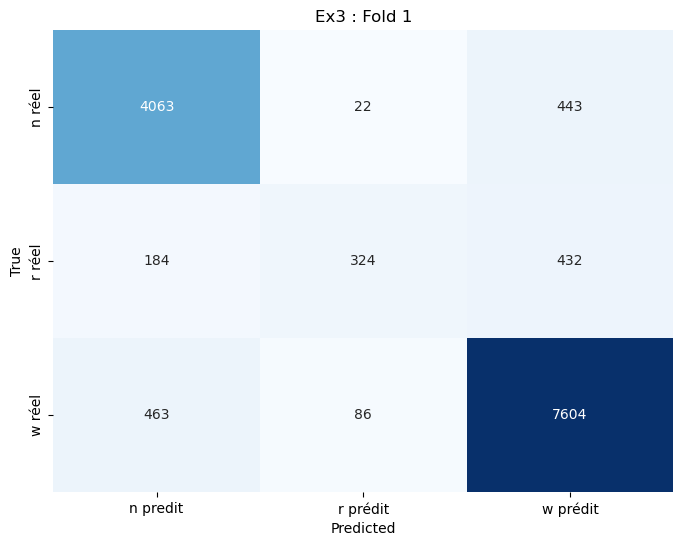

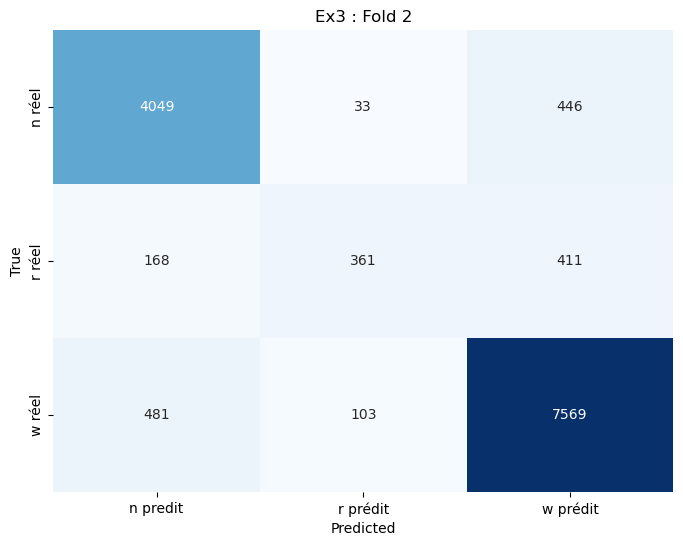

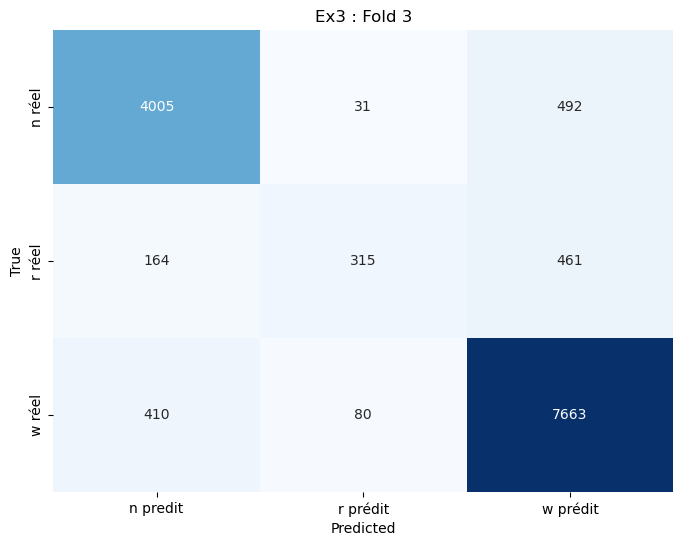

In [84]:
# Plot confusion matrix

cm_list_3 = []

for i, mlp in enumerate(trained_mlp_3):
    y_pred = mlp.predict(input_data_3[test_index_3])
    y_pred = np.round(y_pred)
    y_pred = y_pred.argmax(axis=1)
    y_true = np.argmax(output_data_3[test_index_3], axis=1)
    #y_pred = to_categorical(y_pred, num_classes=3)
    print(y_pred)
    cm = confusion_matrix(y_true, y_pred)
    cm_list_3.append(cm)

for i, cm in enumerate(cm_list_3):
    plot_confusion_matrix_2(cm, title=f"Ex3 : Fold {i+1}")

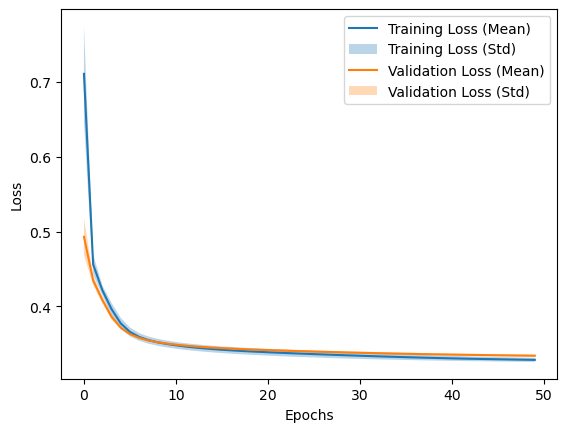

In [85]:
plot_history(history_list_3)

In [86]:
#f1 score mean
f1_scores_3 = []

for i, mlp in enumerate(trained_mlp_3):
    y_pred = np.round(mlp.predict(np.float32(input_data_3)[test_index_3]))
    f1 = f1_score(np.float32(output_data_3)[test_index_3], y_pred, average='micro')
    f1_scores_3.append(f1)

f1_mean_3 = np.mean(f1_scores_3)

for i, f1 in enumerate(f1_scores_3):
    print(f"Fold {i+1}, F1 Score: {f1}")

print(f"\nMean F1 Score: {f1_mean_3}")

426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Fold 1, F1 Score: 0.8826468302431443
Fold 2, F1 Score: 0.8821304057562496
Fold 3, F1 Score: 0.8814776428782943

Mean F1 Score: 0.8820849596258961


### Résultat de différente combinaison, à voir ce qu'on garde
#### 1. 0.8536443148
- LR : 0.001
- M : 0.9
- epoch : 10

Layers :
- 8, tanh
- 1, tanh

#### 2. 0.8567042042007113
- LR : 0.1
- M : 0.0
- epoch : 10

Layers :
- 5, tanh
- 3, tanh
- 1, tanh